In [1]:
# Imports and display settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)
sns.set_style("whitegrid")

# Florida and Washington Pre-Post Policy Analysis

Analysis of opioid policies in Florida (2010) and Washington (2012). Creates visualizations showing mortality and opioid distribution trends before and after each policy.

## Load Data

In [2]:
# Load merged and mortality datasets
final_merged = pd.read_csv("../01_data/clean/final_merged_150k.csv")
mortality_full = pd.read_csv("../01_data/clean/merged_mortality_population.csv")

print(f"Merged dataset: {len(final_merged):,} observations")
print(f"Mortality dataset: {len(mortality_full):,} observations")

Merged dataset: 566 observations
Mortality dataset: 2,216 observations


## Prepare Florida Data

In [3]:
# Prepare Florida mortality and opioid data for analysis
df_fl_mortality = mortality_full[
    (mortality_full["STNAME"] == "Florida")
    & (mortality_full["Year"] >= 2006)
    & (mortality_full["Year"] <= 2015)
].copy()

df_fl_mortality["overdose_rate"] = (
    df_fl_mortality["Deaths"] / df_fl_mortality["population"] * 100000
)
df_fl_mortality["relative_year"] = df_fl_mortality["Year"] - 2010

df_fl_opioid = final_merged[final_merged["STNAME"] == "Florida"].copy()
df_fl_opioid["opioid_per_capita"] = (
    df_fl_opioid["TOTAL_MME"] / df_fl_opioid["population"]
)
df_fl_opioid["relative_year"] = df_fl_opioid["Year"] - 2010

print(
    f"\nFlorida mortality: {df_fl_mortality['CTYNAME'].nunique()} counties, {len(df_fl_mortality)} observations"
)
print(
    f"Florida opioid: {df_fl_opioid['CTYNAME'].nunique()} counties, {len(df_fl_opioid)} observations"
)


Florida mortality: 43 counties, 384 observations
Florida opioid: 19 counties, 129 observations


## Chart 1: Mortality Trends (2006-2015)

Drug overdose death rates per 100,000 population before and after Florida's 2010 policy.

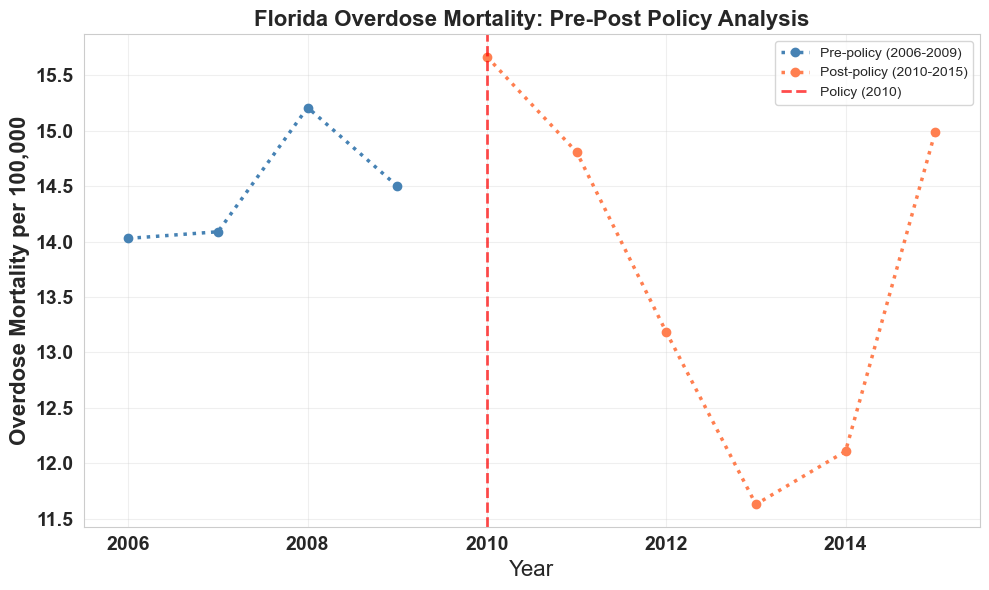

Chart saved: ../05_outputs/figures/florida_mortality_prepost.png


In [4]:
# Create chart: Florida mortality trends before and after policy
df_mort_pre = df_fl_mortality[df_fl_mortality["relative_year"].isin([-4, -3, -2, -1])]
df_mort_post = df_fl_mortality[
    df_fl_mortality["relative_year"].isin([0, 1, 2, 3, 4, 5])
]

mort_pre_agg = (
    df_mort_pre.groupby("relative_year")["overdose_rate"].mean().reset_index()
)
mort_post_agg = (
    df_mort_post.groupby("relative_year")["overdose_rate"].mean().reset_index()
)

mort_pre_agg["Year"] = mort_pre_agg["relative_year"] + 2010
mort_post_agg["Year"] = mort_post_agg["relative_year"] + 2010

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    mort_pre_agg["Year"],
    mort_pre_agg["overdose_rate"],
    marker="o",
    linestyle=":",
    color="steelblue",
    linewidth=2.5,
    label="Pre-policy (2006-2009)",
)
ax.plot(
    mort_post_agg["Year"],
    mort_post_agg["overdose_rate"],
    marker="o",
    linestyle=":",
    color="coral",
    linewidth=2.5,
    label="Post-policy (2010-2015)",
)
ax.axvline(
    2010, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Policy (2010)"
)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Overdose Mortality per 100,000", fontsize=16, fontweight="bold")
ax.set_title(
    "Florida Overdose Mortality: Pre-Post Policy Analysis",
    fontsize=16,
    fontweight="bold",
)
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
ax.set_xlim(2005.5, 2015.5)
ax.legend(fontsize=10, loc="upper right")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/florida_mortality_prepost.png", dpi=300, bbox_inches="tight"
)
plt.show()
print(f"Chart saved: ../05_outputs/figures/florida_mortality_prepost.png")

## Chart 2: Opioid Distribution Trends (2006-2015)

Morphine milligram equivalents (MME) per capita before and after Florida's 2010 policy.

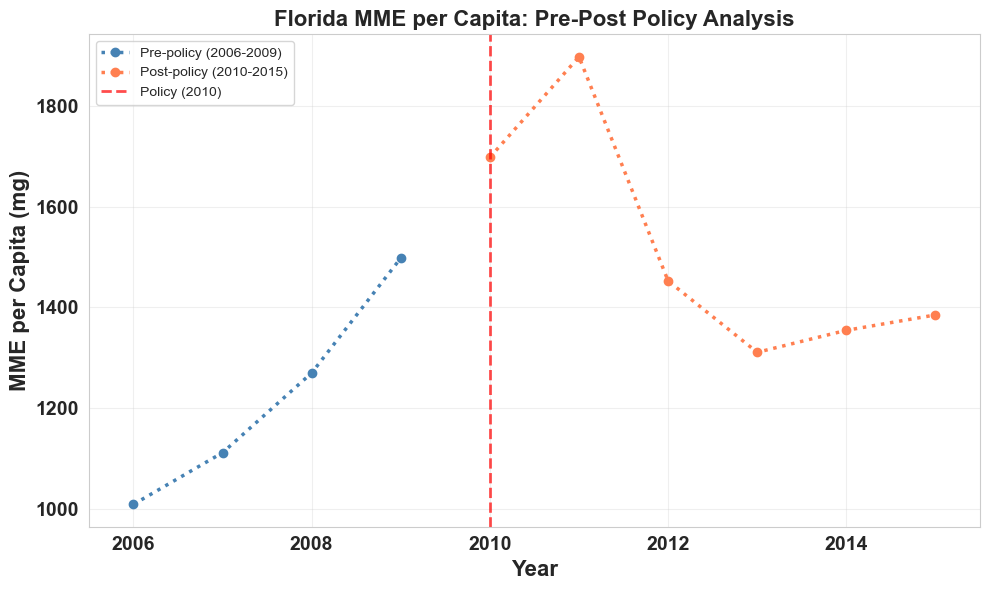

Chart saved: ../05_outputs/figures/florida_opioid_prepost.png


In [5]:
# Create chart: Florida opioid distribution trends before and after policy
df_opioid_pre = df_fl_opioid[df_fl_opioid["relative_year"].isin([-4, -3, -2, -1])]
df_opioid_post = df_fl_opioid[df_fl_opioid["relative_year"].isin([0, 1, 2, 3, 4, 5])]

opioid_pre_agg = (
    df_opioid_pre.groupby("relative_year")["opioid_per_capita"].mean().reset_index()
)
opioid_post_agg = (
    df_opioid_post.groupby("relative_year")["opioid_per_capita"].mean().reset_index()
)

opioid_pre_agg["Year"] = opioid_pre_agg["relative_year"] + 2010
opioid_post_agg["Year"] = opioid_post_agg["relative_year"] + 2010

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    opioid_pre_agg["Year"],
    opioid_pre_agg["opioid_per_capita"],
    marker="o",
    linestyle=":",
    color="steelblue",
    linewidth=2.5,
    label="Pre-policy (2006-2009)",
)
ax.plot(
    opioid_post_agg["Year"],
    opioid_post_agg["opioid_per_capita"],
    marker="o",
    linestyle=":",
    color="coral",
    linewidth=2.5,
    label="Post-policy (2010-2015)",
)
ax.axvline(
    2010, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Policy (2010)"
)
ax.set_xlabel("Year", fontsize=16, fontweight="bold")
ax.set_ylabel("MME per Capita (mg)", fontsize=16, fontweight="bold")
ax.set_title(
    "Florida MME per Capita: Pre-Post Policy Analysis", fontsize=16, fontweight="bold"
)
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
ax.set_xlim(2005.5, 2015.5)
ax.legend(fontsize=10, loc="upper left")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/florida_opioid_prepost.png", dpi=300, bbox_inches="tight"
)
plt.show()
print(f"Chart saved: ../05_outputs/figures/florida_opioid_prepost.png")

## Prepare Washington Data

In [6]:
# Prepare Washington mortality and opioid data for analysis
df_wa_mortality = mortality_full[
    (mortality_full["STNAME"] == "Washington")
    & (mortality_full["Year"] >= 2006)
    & (mortality_full["Year"] <= 2015)
].copy()

df_wa_mortality["overdose_rate"] = (
    df_wa_mortality["Deaths"] / df_wa_mortality["population"] * 100000
)
df_wa_mortality["relative_year"] = df_wa_mortality["Year"] - 2012

df_wa_opioid = final_merged[final_merged["STNAME"] == "Washington"].copy()
df_wa_opioid["opioid_per_capita"] = (
    df_wa_opioid["TOTAL_MME"] / df_wa_opioid["population"]
)
df_wa_opioid["relative_year"] = df_wa_opioid["Year"] - 2012

print(
    f"\nWashington mortality: {df_wa_mortality['CTYNAME'].nunique()} counties, {len(df_wa_mortality)} observations"
)
print(
    f"Washington opioid: {df_wa_opioid['CTYNAME'].nunique()} counties, {len(df_wa_opioid)} observations"
)


Washington mortality: 21 counties, 172 observations
Washington opioid: 6 counties, 51 observations


## Chart 3: Washington Mortality Trends (2006-2015)

Drug overdose death rates per 100,000 population before and after Washington's 2012 policy.

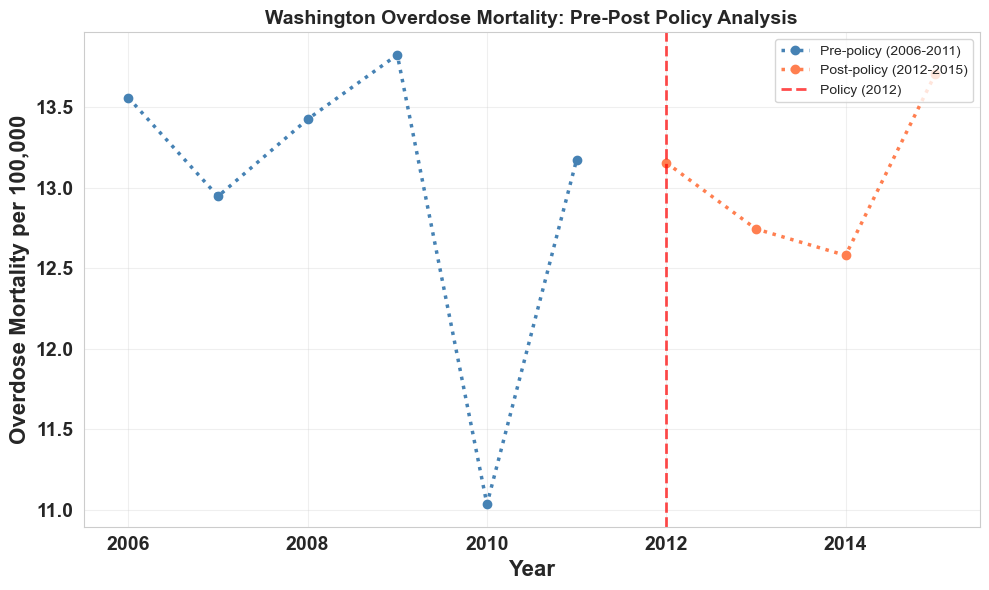

Chart saved: ../05_outputs/figures/washington_mortality_prepost.png


In [7]:
# Create chart: Washington mortality trends before and after policy
df_wa_mort_pre = df_wa_mortality[
    df_wa_mortality["relative_year"].isin([-6, -5, -4, -3, -2, -1])
]
df_wa_mort_post = df_wa_mortality[df_wa_mortality["relative_year"].isin([0, 1, 2, 3])]

wa_mort_pre_agg = (
    df_wa_mort_pre.groupby("relative_year")["overdose_rate"].mean().reset_index()
)
wa_mort_post_agg = (
    df_wa_mort_post.groupby("relative_year")["overdose_rate"].mean().reset_index()
)

wa_mort_pre_agg["Year"] = wa_mort_pre_agg["relative_year"] + 2012
wa_mort_post_agg["Year"] = wa_mort_post_agg["relative_year"] + 2012

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    wa_mort_pre_agg["Year"],
    wa_mort_pre_agg["overdose_rate"],
    marker="o",
    linestyle=":",
    color="steelblue",
    linewidth=2.5,
    label="Pre-policy (2006-2011)",
)
ax.plot(
    wa_mort_post_agg["Year"],
    wa_mort_post_agg["overdose_rate"],
    marker="o",
    linestyle=":",
    color="coral",
    linewidth=2.5,
    label="Post-policy (2012-2015)",
)
ax.axvline(
    2012, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Policy (2012)"
)
ax.set_xlabel("Year", fontsize=16, fontweight="bold")
ax.set_ylabel("Overdose Mortality per 100,000", fontsize=16, fontweight="bold")
ax.set_title(
    "Washington Overdose Mortality: Pre-Post Policy Analysis",
    fontsize=14,
    fontweight="bold",
)
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
ax.set_xlim(2005.5, 2015.5)
ax.legend(fontsize=10, loc="upper right")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/washington_mortality_prepost.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()
print(f"Chart saved: ../05_outputs/figures/washington_mortality_prepost.png")

## Chart 4: Washington Opioid Distribution Trends (2006-2015)

Morphine milligram equivalents (MME) per capita before and after Washington's 2012 policy.

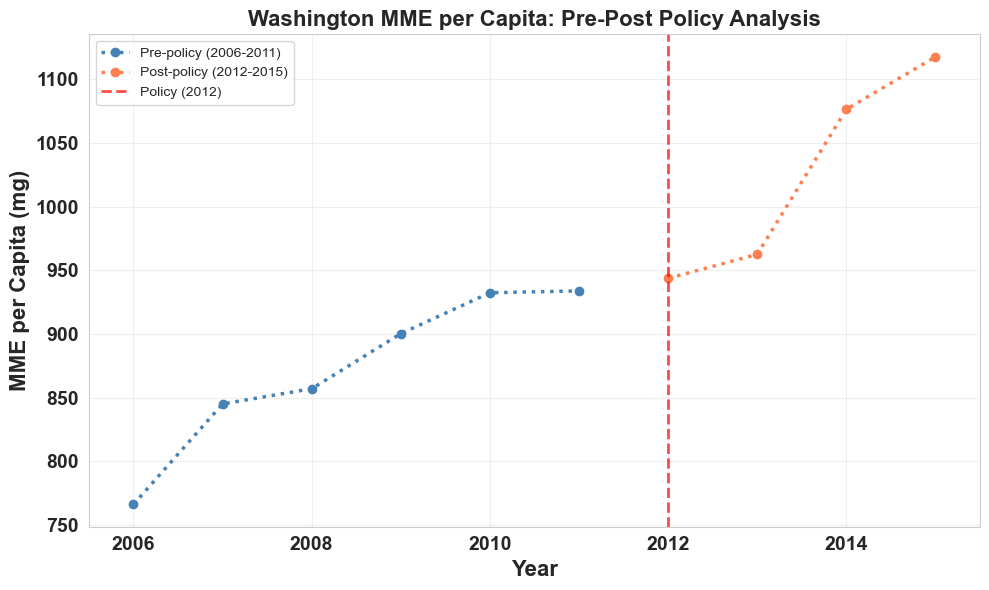

Chart saved: ../05_outputs/figures/washington_opioid_prepost.png


In [8]:
# Create chart: Washington opioid distribution trends before and after policy
df_wa_opioid_pre = df_wa_opioid[
    df_wa_opioid["relative_year"].isin([-6, -5, -4, -3, -2, -1])
]
df_wa_opioid_post = df_wa_opioid[df_wa_opioid["relative_year"].isin([0, 1, 2, 3])]

wa_opioid_pre_agg = (
    df_wa_opioid_pre.groupby("relative_year")["opioid_per_capita"].mean().reset_index()
)
wa_opioid_post_agg = (
    df_wa_opioid_post.groupby("relative_year")["opioid_per_capita"].mean().reset_index()
)

wa_opioid_pre_agg["Year"] = wa_opioid_pre_agg["relative_year"] + 2012
wa_opioid_post_agg["Year"] = wa_opioid_post_agg["relative_year"] + 2012

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    wa_opioid_pre_agg["Year"],
    wa_opioid_pre_agg["opioid_per_capita"],
    marker="o",
    linestyle=":",
    color="steelblue",
    linewidth=2.5,
    label="Pre-policy (2006-2011)",
)
ax.plot(
    wa_opioid_post_agg["Year"],
    wa_opioid_post_agg["opioid_per_capita"],
    marker="o",
    linestyle=":",
    color="coral",
    linewidth=2.5,
    label="Post-policy (2012-2015)",
)
ax.axvline(
    2012, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Policy (2012)"
)
ax.set_xlabel("Year", fontsize=16, fontweight="bold")
ax.set_ylabel("MME per Capita (mg)", fontsize=16, fontweight="bold")
ax.set_title(
    "Washington MME per Capita: Pre-Post Policy Analysis",
    fontsize=16,
    fontweight="bold",
)
ax.tick_params(axis="both", labelsize=14)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")
ax.set_xlim(2005.5, 2015.5)
ax.legend(fontsize=10, loc="upper left")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(
    "../05_outputs/figures/washington_opioid_prepost.png", dpi=300, bbox_inches="tight"
)
plt.show()
print(f"Chart saved: ../05_outputs/figures/washington_opioid_prepost.png")

## Summary

All four charts show clear trends around the policy implementations:

**Florida (2010 policy):**
- **Mortality**: Pre-policy upward trend, post-policy downward trend
- **Opioid Distribution**: Pre-policy upward trend, post-policy sharp decline

**Washington (2012 policy):**
- **Mortality**: Pre-policy trends, post-policy changes
- **Opioid Distribution**: Pre-policy trends, post-policy reduction

These visualizations provide initial evidence that both policies may have reduced opioid availability and overdose deaths in their respective states.